# Task) Steepest Ascent/Descent Hill Climbing Algorithm

Your task is to run the Steepest Descent/Ascent Hill Climbing algorithm for the Travelling Salesman Problem on the supplied data. Run the algorithm 10 times and report back the results. One way to report back the results is to present the convergence of the cost function. Moreover, you can also compare your results with the results obtained using the Simple Hill Climbing algorithm. The data file is in a CSV format and can be downloaded here.

- Step 1: Initial Solution: You can construct your own initial solution (based on either the random or greedy approach).
- Step 2: Neighbourhood operator: Do a swap of two adjacent cities. You are also encouraged to experiment with other neighbourhood operators.
- Step 3: Solution evaluation: Add the cost of travelling through the cities.
- Step 4: Termination Condition: No improvement seen in 100 consecutive iterations (feel free to play around with this parameter by increasing or decreasing the number of iterations).

## Variables

In [35]:
MATRIX_FILE_PATH = './data/TSP Matrix.csv'
MAX_NO_IMPROVEMENT = 100 # Terminate condition

## Load TSP Matrix.csv to plot

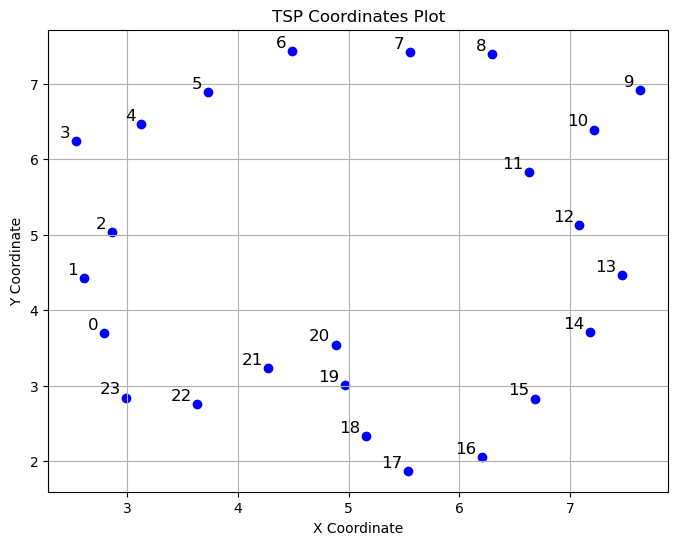

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def label_cities(data):
    for i, (x, y) in enumerate(zip(data[0], data[1])):
        plt.text(x - 0.05, y + 0.05, str(i), fontsize=12, ha='right')

def load_matrix(file_path):

    coordinates = pd.read_csv(file_path, header=None)

    x = coordinates[0]
    y = coordinates[1]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue')
    
    label_cities(coordinates)
    
    plt.title('TSP Coordinates Plot')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)

    plt.show()
    
    return coordinates

coordinates = load_matrix(MATRIX_FILE_PATH)


## Use Euclidean distance formula to calculate inter-city distance

In [37]:
def calculate_euclidean_distance(df):
    x = df[0].values
    y = df[1].values

    n_points = len(x)

    distance_matrix = pd.DataFrame(np.zeros((n_points, n_points)))

    for i in range(n_points):
        for j in range(n_points):
            distance = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            distance_matrix.iloc[i, j] = distance

    return distance_matrix

distance_matrix = calculate_euclidean_distance(coordinates)

# 結果を表示
print(distance_matrix)


          0         1         2         3         4         5         6   \
0   0.000000  0.754828  1.344955  2.564838  2.796048  3.327688  4.111249   
1   0.754828  0.000000  0.662256  1.822121  2.109786  2.705419  3.553030   
2   1.344955  0.662256  0.000000  1.250632  1.457410  2.043680  2.901820   
3   2.564838  1.822121  1.250632  0.000000  0.627936  1.349135  2.283698   
4   2.796048  2.109786  1.457410  0.627936  0.000000  0.731248  1.670595   
5   3.327688  2.705419  2.043680  1.349135  0.731248  0.000000  0.939428   
6   4.111249  3.553030  2.901820  2.283698  1.670595  0.939428  0.000000   
7   4.641222  4.205051  3.599568  3.235777  2.607870  1.903985  1.066704   
8   5.098828  4.739405  4.170696  3.931699  3.305480  2.622847  1.813853   
9   5.815422  5.610638  5.130404  5.137388  4.528793  3.906714  3.189670   
10  5.185921  5.016356  4.566652  4.682378  4.093980  3.527860  2.926181   
11  4.393320  4.264026  3.855338  4.114577  3.564831  3.093750  2.684420   
12  4.526200

## Step 1: Initial Solution: You can construct your own initial solution (based on either the random or greedy approach).

In [38]:
def calculate_total_distance(path, matrix):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += matrix[path[i]][path[i+1]]
    return total_distance

def generate_random_initial_solution_from_coordinates(df):
    n_cities = len(df)
    
    cities = np.arange(n_cities)
    np.random.shuffle(cities)
        
    cities = np.append(cities, cities[0])
        
    return cities

initial_solution = generate_random_initial_solution_from_coordinates(coordinates)
initial_cost = calculate_total_distance(initial_solution, distance_matrix)

print(f"Initial Solution (randon): {initial_solution}")
print(f"Initial cost: {initial_cost}")


Initial Solution (randon): [18 11 15  0  2  8 19  6 12 21 14 16 20  7 23  4 17 10 22 13  3  1  5  9
 18]
Initial cost: 90.11214712048971


## Step 2: Neighbourhood operator: Do a swap of two adjacent cities. You are also encouraged to experiment with other neighbourhood operators.

In [40]:
def swap_two_cities(path, i, j):
    new_path = path.copy()
    new_path[i], new_path[j] = new_path[j], new_path[i]
    return new_path

def steepest_ascent_hill_climbing(initial_solution, matrix, max_no_improvement=100):
    current_solution = initial_solution
    current_distance = calculate_total_distance(current_solution, matrix)

    no_improvement_count = 0
    history = [] 

    while no_improvement_count < max_no_improvement:
        best_neighbour = None
        best_neighbour_distance = current_distance
        
        # start from second city to swap adajent cities to find better solution.
        for i in range(1, len(current_solution) - 2): 
            new_solution = swap_two_cities(current_solution, i, i + 1)
            new_distance = calculate_total_distance(new_solution, matrix)
            
            if new_distance < best_neighbour_distance:
                best_neighbour = new_solution
                best_neighbour_distance = new_distance
        
        if best_neighbour_distance >= current_distance:
            no_improvement_count += 1
            history.append((current_solution.copy(), current_distance, "No Improvement"))
        else:
            current_solution = best_neighbour
            current_distance = best_neighbour_distance
            no_improvement_count = 0
            history.append((current_solution.copy(), current_distance, "Improved"))

    return current_solution, current_distance, history


best_solution, best_distance, history = steepest_ascent_hill_climbing(initial_solution, distance_matrix, max_no_improvement=MAX_NO_IMPROVEMENT)

print("Best Solution (Visit Order):")
print(best_solution)
print("Best Total Distance:")
print(best_distance)

print("History of Improvements:")
for step, (solution, distance, status) in enumerate(history):
    print(f"Step {step+1}: Distance = {distance}, Status = {status}")
    print(f" Path = {solution}")

Best Solution (Visit Order):
[18 15 11  2  0 19  6  8 12 14 16 21 20  7  4 23 22 17 13 10  1  3  5  9
 18]
Best Total Distance:
62.4653742519823
History of Improvements:
Step 1: Distance = 85.00456880803814, Status = Improved
 Path = [18 11 15  0  2  8 19  6 12 21 14 16 20  7  4 23 17 10 22 13  3  1  5  9
 18]
Step 2: Distance = 80.01628065404564, Status = Improved
 Path = [18 11 15  0  2  8 19  6 12 21 14 16 20  7  4 23 17 22 10 13  3  1  5  9
 18]
Step 3: Distance = 76.12617798828374, Status = Improved
 Path = [18 11 15  0  2 19  8  6 12 21 14 16 20  7  4 23 17 22 10 13  3  1  5  9
 18]
Step 4: Distance = 73.76006853711952, Status = Improved
 Path = [18 11 15  0  2 19  8  6 12 21 14 16 20  7  4 23 22 17 10 13  3  1  5  9
 18]
Step 5: Distance = 71.61236802651482, Status = Improved
 Path = [18 11 15  0  2 19  8  6 12 21 14 16 20  7  4 23 22 17 13 10  3  1  5  9
 18]
Step 6: Distance = 69.83456932351534, Status = Improved
 Path = [18 15 11  0  2 19  8  6 12 21 14 16 20  7  4 23 22 17 1

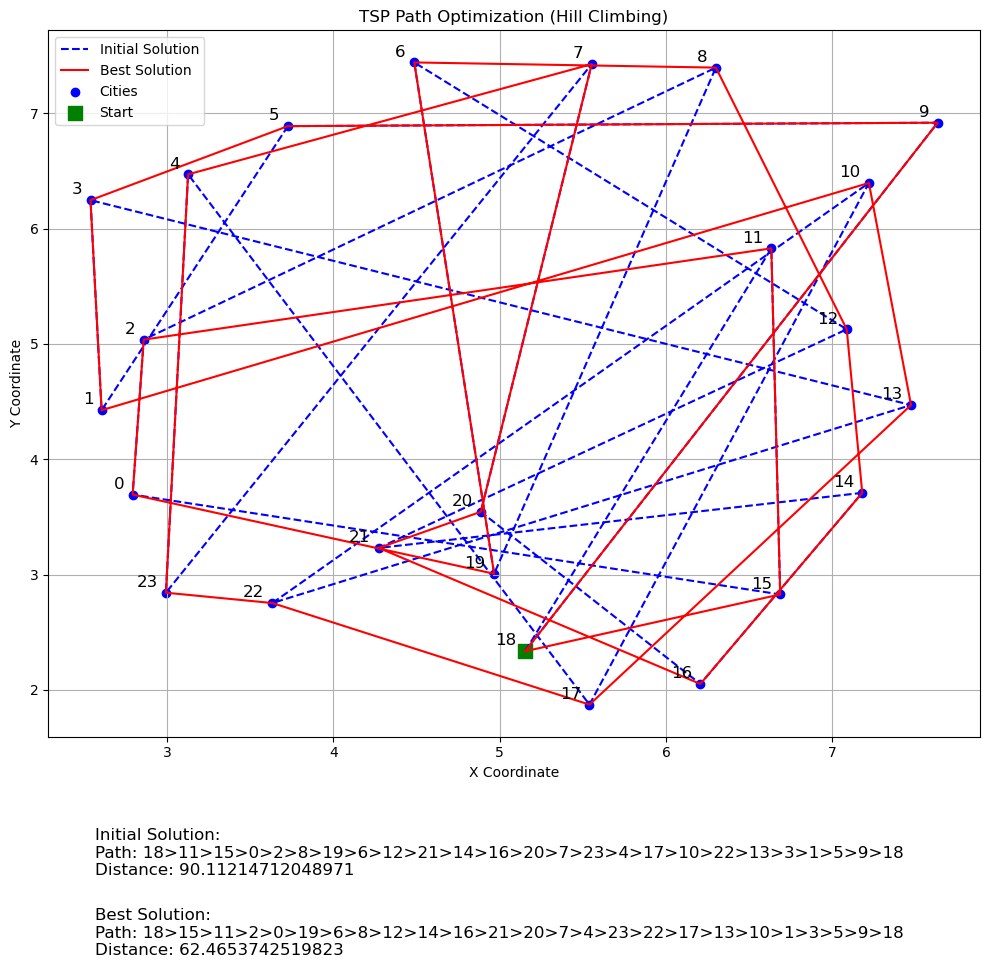

In [41]:
def plot_tsp_path(coordinates, path, color, label=None, linestyle='-'):
    x = coordinates[0].values
    y = coordinates[1].values
    path_x = [x[i] for i in path] + [x[path[0]]]  
    path_y = [y[i] for i in path] + [y[path[0]]]  
    plt.plot(path_x, path_y, color=color, linestyle=linestyle, label=label)
    
def plot_cities(coordinates, path):
    start_city = path[0]
    goal_city = path[-1]
    
    # plot except start point
    all_cities = list(range(len(coordinates[0])))
    cities_to_plot = [city for city in all_cities if city != start_city and city != goal_city]
    plt.scatter(coordinates[0][cities_to_plot], coordinates[1][cities_to_plot], c='blue', marker='o', label='Cities')
    
    # plot and start point
    plt.scatter(coordinates[0][start_city], coordinates[1][start_city], color='green', marker='s', s=100, label='Start')  # 四角

    
plt.figure(figsize=(10, 8))

# plot initial path
plot_tsp_path(coordinates, initial_solution, color='blue', label='Initial Solution', linestyle='--')

# plot best path
plot_tsp_path(coordinates, best_solution, color='red', label='Best Solution', linestyle='-')

plot_cities(coordinates, best_solution)

label_cities(coordinates)

plt.title('TSP Path Optimization (Hill Climbing)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.legend()

initial_solution_str = '>'.join(map(str, initial_solution))
best_solution_str = '>'.join(map(str, best_solution))

plt.figtext(0.1, -0.1, f'Initial Solution: \nPath: {initial_solution_str}\nDistance: {calculate_total_distance(initial_solution, distance_matrix)}', fontsize=12)
plt.figtext(0.1, -0.2, f'Best Solution: \nPath: {best_solution_str}\nDistance: {best_distance}', fontsize=12)

plt.tight_layout()

plt.show()